# Présentation

Ce notebook contient les consignes ainsi que des emplacements vides pour apporter les réponses aux questions posées.

Ne changez pas les noms de variable qui vous sont proposées.




# Echauffement

## Création DataFrame à partir de 0 

A partir d'une base de données SQLite3 dont le code python est présent ci-dessous, nous allons recréer un dataframe manuellement basée sur les mêmes données. En seconde partie, nous verrons comment convertir un résultat de requêtes SQL directement en dataframe

```csv
fruit,origin,quantity
apple,france,12
apple,germany,78
apple,france,19
orange,france,10
orange,germany,98
strawberry,spain,2
```

la requête SQL pour créer la table contenant ces données

```sql
CREATE TABLE basket(fruit text, origin text, quantity int)
```


In [1]:
import pandas as pd

Créer une série représentant la colonne `fruit` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [2]:
fruit_data = ['apple', 'apple', 'apple', 'orange', 'orange', 'strawberry']

fruit = pd.Series(fruit_data)
fruit

0         apple
1         apple
2         apple
3        orange
4        orange
5    strawberry
dtype: object

Créer une série représentant la colonne `origin` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [4]:
origin_data = ['france', 'germany', 'france', 'france', 'germany', 'spain']

origin = pd.Series(origin_data)

origin

0     france
1    germany
2     france
3     france
4    germany
5      spain
dtype: object

Créer une série représentant la colonne `quantity` en utilisant le constructeur [`pd.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

In [5]:
quantity_data = [12, 78, 19, 10, 98, 2]

quantity = pd.Series(quantity_data)

quantity

0    12
1    78
2    19
3    10
4    98
5     2
dtype: int64

Créer un dataframe composé de ces 3 séries créées précédemment grâce au constructeur [`pd.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame)

In [6]:
basket = pd.DataFrame({'fruit': fruit, 'origin': origin, 'quantity': quantity})
basket

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98
5,strawberry,spain,2


## Création DataFrame à partir d'un fichier CSV

Vous obtenez une seconde série de données, via un fichier CSV cette fois-ci. Vous pouvez donc lire le fichier CSV directement via la méthode `read_csv`.

Ce fichier CSV contient les informations suivantes

```csv
fruit,origin,quantity
kiwi,uk,12
kiwi,new zealand,78
pineapple,france,19
blueberry,canada,10
blueberry,canada,98
strawberry,spain,2
```

In [7]:
basketTom = pd.read_csv('./csv/fruit.csv') 
basketTom

,fruit,origin,quantity
0,kiwi,uk,12
1,kiwi,new zealand,78
2,pineapple,france,19
3,blueberry,canada,10
4,blueberry,canada,98
5,strawberry,spain,2


Combiner les dataframes basket et basketTom en un nouveau dataframe basketFull

In [8]:
basketFull = pd.concat([basket, basketTom], ignore_index=True)
basketFull

,fruit,origin,quantity
0,apple,france,12
1,apple,germany,78
2,apple,france,19
3,orange,france,10
4,orange,germany,98
5,strawberry,spain,2
6,kiwi,uk,12
7,kiwi,new zealand,78
8,pineapple,france,19
9,blueberry,canada,10


## Requêtes sur le DataFrame
Pour répondre à chacune des questions, proposer une requête sur le dataframe `basketFull`. Attention à ne jamais modifier le dataframe `basketFull`.

Quelle est la quantité max envoyée par pays d'origine tous fruits confondus ?

In [9]:
# groupby pour grouper l'origine et calculer la quantité maximale
max_quantity_by_origin = basketFull.groupby('origin')['quantity'].max()

max_quantity_by_origin

origin
canada         98
france         19
germany        98
new zealand    78
spain           2
uk             12
Name: quantity, dtype: int64

Quelle est la quantité max reçue par fruit et par pays d'origine ?

In [10]:
max_quantite_recu = basketFull.groupby(['fruit', 'origin'])['quantity'].max()
max_quantite_recu

fruit       origin     
apple       france         19
            germany        78
blueberry   canada         98
kiwi        new zealand    78
            uk             12
orange      france         10
            germany        98
pineapple   france         19
strawberry  spain           2
Name: quantity, dtype: int64

Quelle est la quantité totale de fruits reçus par fruit ?

In [11]:
total_quantite_recu = basketFull.groupby('fruit')['quantity'].sum()

total_quantite_recu

fruit
apple         109
blueberry     108
kiwi           90
orange        108
pineapple      19
strawberry      4
Name: quantity, dtype: int64

Afficher dans un graphique de barres empilées la quantité de fruits transférés.

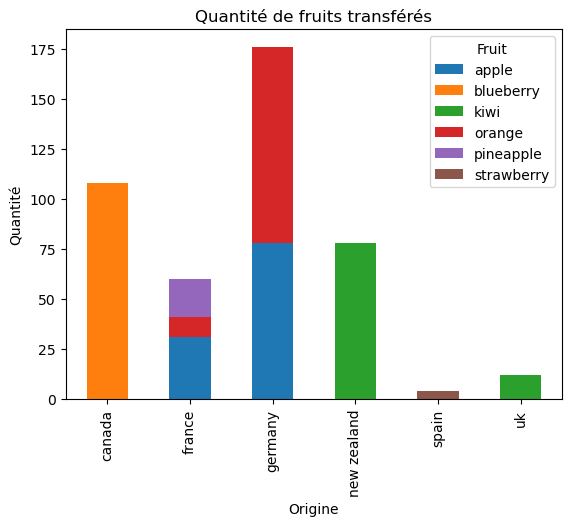

In [12]:
import matplotlib.pyplot as plt

# pivot_table pour grouper les données
pivot_table = basketFull.pivot_table(index='origin', columns='fruit', values='quantity', aggfunc='sum')

# graphique empilé
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Origine')
plt.ylabel('Quantité')
plt.title('Quantité de fruits transférés')
plt.legend(title='Fruit')


# Transactions immobilières

Pour cette seconde partie, nous repartons sur la collecte des transactions immobilières et nous allons tenter d'identifier les caractéristiques les plus pertinentes.

Télécharger le [fichier des transactions immobilières](https://static.data.gouv.fr/resources/demandes-de-valeurs-foncieres/20230405-160733/valeursfoncieres-2022.txt)

Créer un premier dataframe qui ne va conserver que les transactions relatives à Charleville-Mézières.

Modifier le dataframe pour convertir les montants en k€.

Conserver dans le dataframe uniquement les colonnes utiles :
- No voie
- Type de voie
- Code voie
- Voie
- Code postal
- Commune
- Code departement
- Code commune
- Valuer fonciere
- Nombre pieces principales
- Surface Carrez du 1er lot

Grâce l'[API Adresse](https://adresse.data.gouv.fr/api-doc/adresse), envoyer votre fichier d'adresse pour récupérer les coordonnées GPS correspondantes

Construire un nouveau dataframe contenant uniquement latitude, longitude, valeur foncière, surface et nbre de pièces


Afficher un 1er graphique x = latitude, y = longitude et la couleur correspondant au prix sous forme de scatter.

Indiquer quelle est la valeur de la transaction immobilière la plus importante.

Où se situe le centre géographique de toutes les transactions enregistrées ?


In [29]:

# Charger le fichier
transactions_immobilieres = pd.read_csv('./csv/valeursfoncieres-2022.txt', sep='|', dtype=str)
transactions_immobilieres.dropna(axis=1, how='all', inplace=True)

transactions_immobilieres

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,NaN,RUE,2280,DE LA LIBERTE,1000,...,NaN,NaN,1,2,Appartement,24,1,NaN,NaN,NaN
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,88
3,000001,03/01/2022,Vente,"143000,00",98,NaN,RTE,0055,DE LA DOMBES,1480,...,NaN,NaN,1,2,Appartement,140,3,NaN,NaN,NaN
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3803880,000001,30/12/2022,Vente,"3500000,00",19,NaN,RUE,4879,JEAN DOLENT,75014,...,NaN,NaN,1,4,Local industriel. commercial ou assimilé,327,0,NaN,NaN,NaN
3803881,000001,19/12/2022,Vente,"525000,00",3,NaN,RUE,3842,FREDERIC MAGISSON,75015,...,NaN,NaN,2,3,Dépendance,0,0,NaN,NaN,NaN
3803882,000001,19/12/2022,Vente,"525000,00",3,NaN,RUE,3842,FREDERIC MAGISSON,75015,...,NaN,NaN,2,2,Appartement,40,3,NaN,NaN,NaN
3803883,000001,30/12/2022,Vente,"15500,00",69,NaN,RUE,0679,BARRAULT,75013,...,NaN,NaN,1,3,Dépendance,0,0,NaN,NaN,NaN


In [55]:
# Créer un premier dataframe qui ne va conserver que les transactions relatives à Charleville-Mézières.
charleville_transactions = transactions_immobilieres[transactions_immobilieres['Commune'] == 'CHARLEVILLE-MEZIERES']

charleville_transactions

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
238338,000001,06/01/2022,Vente,"75000,00",1,NaN,RUE,1680,HENRI RENAUDIN,8000,...,NaN,NaN,2,2,Appartement,75,2,NaN,NaN,NaN
238339,000001,06/01/2022,Vente,"75000,00",1,NaN,RUE,1680,HENRI RENAUDIN,8000,...,NaN,NaN,2,3,Dépendance,0,0,NaN,NaN,NaN
238376,000001,05/01/2022,Vente,"45000,00",34,NaN,AV,0630,CHARLES DE GAULLE,8000,...,NaN,NaN,1,4,Local industriel. commercial ou assimilé,94,0,NaN,NaN,NaN
238377,000001,05/01/2022,Vente,"45000,00",34,NaN,AV,0630,CHARLES DE GAULLE,8000,...,NaN,NaN,1,3,Dépendance,0,0,NaN,NaN,NaN
238380,000001,10/01/2022,Vente,"95000,00",1,NaN,RUE,3450,DU RETHELOIS,8000,...,NaN,NaN,0,1,Maison,77,4,S,NaN,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255831,000001,20/12/2022,Vente,"90500,00",8,A,RUE,3160,PIERRE CURIE,8000,...,NaN,NaN,2,2,Appartement,65,4,NaN,NaN,NaN
255832,000001,20/12/2022,Vente,"90500,00",8,A,RUE,3160,PIERRE CURIE,8000,...,NaN,NaN,2,3,Dépendance,0,0,NaN,NaN,NaN
255924,000001,30/12/2022,Vente,"170000,00",15,NaN,RUE,3411,DE LA REINE DES PRES,8000,...,NaN,NaN,0,1,Maison,87,4,S,NaN,275
255939,000001,27/12/2022,Vente,"51000,00",34,NaN,RUE,3210,PORTE DE BOURGOGNE,8000,...,NaN,NaN,2,2,Appartement,71,3,NaN,NaN,NaN


In [57]:
# Assurez-vous que la colonne 'Valeur fonciere' est de type chaîne de caractères ('str')
charleville_transactions['Valeur fonciere'] = charleville_transactions['Valeur fonciere'].astype(str)

# Ensuite, effectuez le remplacement de ',' par '.' et la conversion en float
charleville_transactions['Valeur fonciere'] = charleville_transactions['Valeur fonciere'].str.replace(',', '.').astype(float) / 1000

# Définissez un seuil minimum
seuil_minimum = 0.001  # Montant minimum en k€

# Filtrer les données pour ne conserver que les transactions supérieures ou égales au seuil
charleville_transactions = charleville_transactions[charleville_transactions['Valeur fonciere'] >= seuil_minimum]

# Affichez la colonne 'Valeur fonciere' pour vérifier les valeurs en k€
print(charleville_transactions['Valeur fonciere'].unique())


[7.5000000e-02 4.5000000e-02 9.5000000e-02 5.0000000e-02 4.6000000e-02
 1.6500000e-01 3.4500000e-01 7.8037000e-02 5.2000000e-02 1.1800000e-01
 2.2500000e-01 9.3800000e-02 1.0120000e-01 6.7000000e-02 2.4500000e-02
 5.5000000e-02 3.8300000e-01 8.5000000e-02 1.4500000e-01 2.2600000e-01
 6.9900000e-02 7.0000000e-02 1.3500000e-01 1.4100000e-01 1.2900000e-01
 5.0000000e-03 1.0000000e-01 9.6000000e-02 5.7000000e-02 2.8900000e-01
 7.3500000e-02 1.4670000e-01 1.0500000e-01 4.1500000e-02 7.6000000e-02
 8.3310000e-02 1.2600000e-01 1.1500000e-01 5.7500000e-02 1.4500000e-03
 7.7000000e-02 1.6900000e-01 5.4600000e-02 1.5700000e-01 8.2400000e-03
 9.7000000e-02 1.4700000e-01 1.2000000e-03 3.4000000e-01 2.4000000e-03
 3.3500000e-01 5.9900000e-02 1.5000000e-01 1.1000000e-01 3.0000000e-02
 1.6780500e-01 1.2000000e-01 1.3600000e-01 2.8000000e-02 4.5000000e-01
 2.4500000e-01 1.9990000e-01 3.8000000e-02 5.4500000e-02 2.0000000e-02
 1.5600000e-01 1.4800500e-01 1.1100000e-01 1.2500000e-01 2.6600000e-01
 2.000

C:\Users\Stagiaire\AppData\Local\Temp\ipykernel_19668\2232649876.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charleville_transactions['Valeur fonciere'] = charleville_transactions['Valeur fonciere'].astype(str)
C:\Users\Stagiaire\AppData\Local\Temp\ipykernel_19668\2232649876.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charleville_transactions['Valeur fonciere'] = charleville_transactions['Valeur fonciere'].str.replace(',', '.').astype(float) / 1000


In [58]:
# Conserver dans le dataframe uniquement les colonnes utiles :
colonnes_utiles = ['No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
                   'Commune', 'Code departement', 'Code commune',
                   'Valeur fonciere', 'Nombre pieces principales', 'Surface Carrez du 1er lot']

charleville_transactions = charleville_transactions[colonnes_utiles]

charleville_transactions

,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Valeur fonciere,Nombre pieces principales,Surface Carrez du 1er lot
238338,1,RUE,1680,HENRI RENAUDIN,8000,CHARLEVILLE-MEZIERES,08,105,0.075 k€,2,NaN
238339,1,RUE,1680,HENRI RENAUDIN,8000,CHARLEVILLE-MEZIERES,08,105,0.075 k€,0,NaN
238376,34,AV,0630,CHARLES DE GAULLE,8000,CHARLEVILLE-MEZIERES,08,105,0.045 k€,0,"91,52"
238377,34,AV,0630,CHARLES DE GAULLE,8000,CHARLEVILLE-MEZIERES,08,105,0.045 k€,0,NaN
238380,1,RUE,3450,DU RETHELOIS,8000,CHARLEVILLE-MEZIERES,08,105,0.095 k€,4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
255831,8,RUE,3160,PIERRE CURIE,8000,CHARLEVILLE-MEZIERES,08,105,0.090 k€,4,NaN
255832,8,RUE,3160,PIERRE CURIE,8000,CHARLEVILLE-MEZIERES,08,105,0.090 k€,0,NaN
255924,15,RUE,3411,DE LA REINE DES PRES,8000,CHARLEVILLE-MEZIERES,08,105,0.170 k€,4,NaN
255939,34,RUE,3210,PORTE DE BOURGOGNE,8000,CHARLEVILLE-MEZIERES,08,105,0.051 k€,3,NaN


In [60]:
import requests
import pandas as pd

# Fonction pour obtenir les coordonnées GPS à partir de l'adresse
def get_coordinates_from_address(address):
    api_url = 'https://api-adresse.data.gouv.fr/search/'
    params = {'q': address, 'limit': 1}
    response = requests.get(api_url, params=params)
    data = response.json()
    
    if 'features' in data and len(data['features']) > 0:
        location = data['features'][0]['geometry']['coordinates']
        return location[1], location[0]  # Latitude, Longitude
    else:
        return None, None

# Créer des listes vides pour les latitudes et longitudes
latitudes = []
longitudes = []

# Parcourir chaque ligne du DataFrame
for index, row in charleville_transactions.iterrows():
    # Obtenir les coordonnées GPS à partir de l'adresse
    latitude, longitude = get_coordinates_from_address(row['Adresse'])
    
    # Ajouter les coordonnées à leurs listes respectives
    latitudes.append(latitude)
    longitudes.append(longitude)

# Créer un nouveau DataFrame avec les coordonnées, la valeur foncière et le nombre de pièces
nouveau_dataframe = pd.DataFrame({'Latitude': latitudes, 'Longitude': longitudes, 'Valeur fonciere': charleville_transactions['Valeur fonciere'], 'Nombre pieces principales': charleville_transactions['Nombre pieces principales']})

# Afficher le nouveau DataFrame
print(nouveau_dataframe)


KeyError: 'Adresse'

In [ ]:
import matplotlib.pyplot as plt

# Afficher un 1er graphique x = latitude, y = longitude et la couleur correspondant au prix sous forme de scatter.
plt.scatter(nouveau_dataframe['Latitude'], nouveau_dataframe['Longitude'], c=nouveau_dataframe['Valeur fonciere'], cmap='viridis')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Transactions immobilières à Charleville-Mézières')
plt.colorbar(label='Valeur foncière (k€)')


In [23]:
# Indiquer quelle est la valeur de la transaction immobilière la plus importante
valeur_maximale = nouveau_dataframe['Valeur fonciere'].max()
print(f"La valeur de la transaction immobilière la plus importante est de {valeur_maximale} k€.")

In [ ]:
# Où se situe le centre géographique de toutes les transactions enregistrées ?
centre_latitude = nouveau_dataframe['Latitude'].mean()
centre_longitude = nouveau_dataframe['Longitude'].mean()
print(f"Le centre géographique de toutes les transactions enregistrées se situe à :")
print(f"Latitude : {centre_latitude}")
print(f"Longitude : {centre_longitude}")